In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("cleaned_cars24.csv")

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               580 non-null    object 
 1   Year               580 non-null    int64  
 2   Brand              580 non-null    object 
 3   Model              580 non-null    object 
 4   Fuel_Type          580 non-null    object 
 5   Transmission       580 non-null    object 
 6   KM_Driven          580 non-null    float64
 7   Owner              580 non-null    object 
 8   EMI_Price          580 non-null    float64
 9   Price              580 non-null    float64
 10  KM_Representation  580 non-null    object 
 11  Car_Age            580 non-null    int64  
 12  Price_per_KM       580 non-null    float64
 13  Price_Category     580 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 63.6+ KB
None


In [12]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 City                 0
Year                 0
Brand                0
Model                0
Fuel_Type            0
Transmission         0
KM_Driven            0
Owner                0
EMI_Price            0
Price                0
KM_Representation    0
Car_Age              0
Price_per_KM         0
Price_Category       0
dtype: int64


In [13]:
df.describe(include='all')

,City,Year,Brand,Model,Fuel_Type,Transmission,KM_Driven,Owner,EMI_Price,Price,KM_Representation,Car_Age,Price_per_KM,Price_Category
count,580,580.000000,580,580,580,580,5.800000e+02,580,580.000000,580.000000,580,580.000000,580.000000,580
unique,25,NaN,16,96,3,2,NaN,5,NaN,NaN,2,NaN,NaN,2
top,Chandigarh,NaN,Maruti,Alto,Petrol,Manual,NaN,1St Owner,NaN,NaN,L,NaN,NaN,Budget
freq,40,NaN,154,29,432,498,NaN,426,NaN,NaN,574,NaN,NaN,579
mean,NaN,2018.500000,NaN,NaN,NaN,NaN,5.780499e+05,NaN,12496.013793,17782.982759,NaN,6.500000,0.062362,NaN
std,NaN,3.664468,NaN,NaN,NaN,NaN,3.429380e+05,NaN,6513.175487,29701.877629,NaN,3.664468,0.197200,NaN
min,NaN,2008.000000,NaN,NaN,NaN,NaN,5.000000e+04,NaN,3203.000000,3203.000000,NaN,1.000000,0.020000,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,3.397500e+05,NaN,8259.250000,8259.250000,NaN,3.000000,0.020000,NaN
50%,NaN,2019.000000,NaN,NaN,NaN,NaN,5.144995e+05,NaN,10889.000000,11292.000000,NaN,6.000000,0.020000,NaN
75%,NaN,2022.000000,NaN,NaN,NaN,NaN,7.022500e+05,NaN,14808.250000,15891.250000,NaN,9.000000,0.020000,NaN


In [15]:
df.columns

Index(['City', 'Year', 'Brand', 'Model', 'Fuel_Type', 'Transmission',
       'KM_Driven', 'Owner', 'EMI_Price', 'Price', 'KM_Representation',
       'Car_Age', 'Price_per_KM', 'Price_Category'],
      dtype='object')

In [17]:
df.shape

(580, 14)

In [19]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Year', 'KM_Driven', 'EMI_Price', 'Price', 'Car_Age', 'Price_per_KM']
Categorical Columns: ['City', 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner', 'KM_Representation', 'Price_Category']


In [22]:
# 1. Numerical Columns (Distribution + Summary)

df[numerical_cols].describe()

,Year,KM_Driven,EMI_Price,Price,Car_Age,Price_per_KM
count,580.000000,5.800000e+02,580.000000,580.000000,580.000000,580.000000
mean,2018.500000,5.780499e+05,12496.013793,17782.982759,6.500000,0.062362
std,3.664468,3.429380e+05,6513.175487,29701.877629,3.664468,0.197200
min,2008.000000,5.000000e+04,3203.000000,3203.000000,1.000000,0.020000
25%,2016.000000,3.397500e+05,8259.250000,8259.250000,3.000000,0.020000
50%,2019.000000,5.144995e+05,10889.000000,11292.000000,6.000000,0.020000
75%,2022.000000,7.022500e+05,14808.250000,15891.250000,9.000000,0.020000
max,2024.000000,2.089999e+06,55530.000000,315000.000000,17.000000,1.410000


# UNIVARIATE ANALYSIS

### 1.1 Distribution of Price (Numerical)

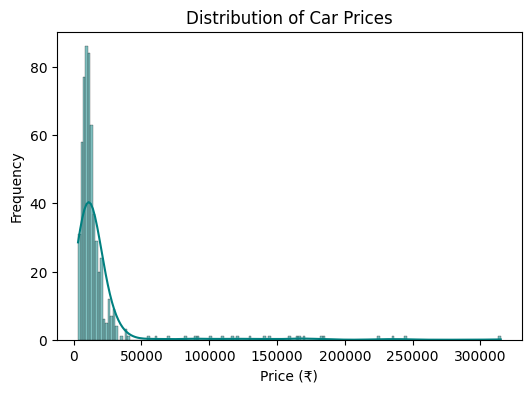

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True, color='teal')
plt.title("Distribution of Car Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()

### 1.2 Distribution of KM Driven

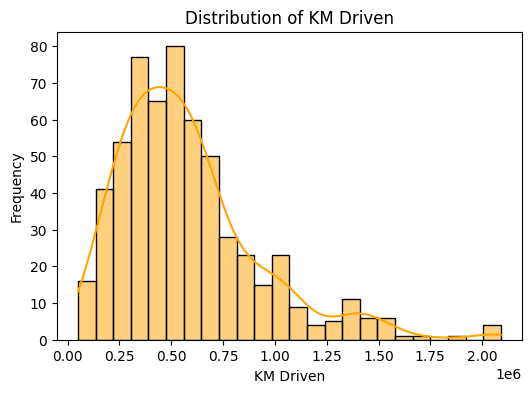

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(df['KM_Driven'], kde=True, color='orange')
plt.title("Distribution of KM Driven")
plt.xlabel("KM Driven")
plt.ylabel("Frequency")
plt.show()


### 1.3 Distribution of Car Age

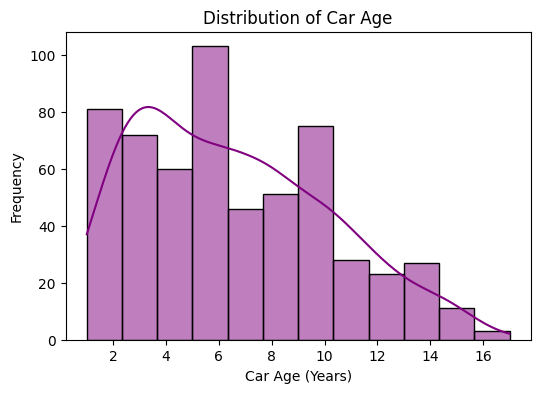

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(df['Car_Age'], kde=True, color='purple')
plt.title("Distribution of Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Frequency")
plt.show()


### 1.4 Count of Cars by Brand (Top 10)

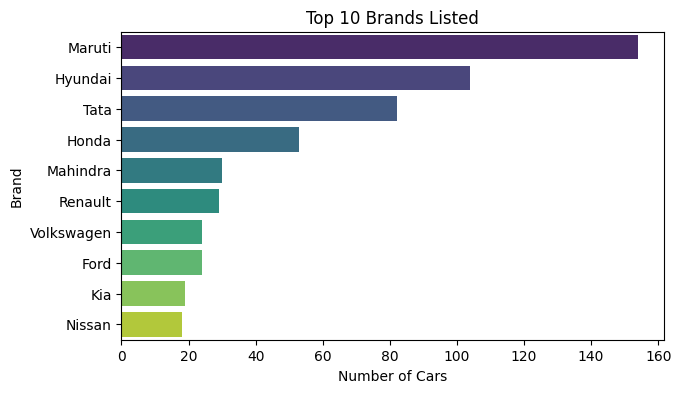

In [31]:
plt.figure(figsize=(7,4))
top_brands = df['Brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title("Top 10 Brands Listed")
plt.xlabel("Number of Cars")
plt.ylabel("Brand")
plt.show()


In [32]:
### 1.5 Fuel Type Distribution

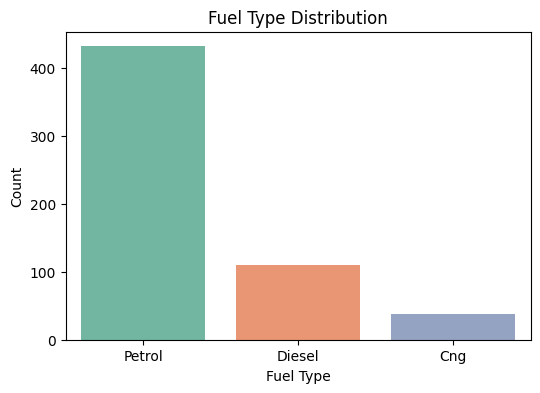

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='Fuel_Type', data=df, palette="Set2")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()


### 1.6 Transmission Type Distribution

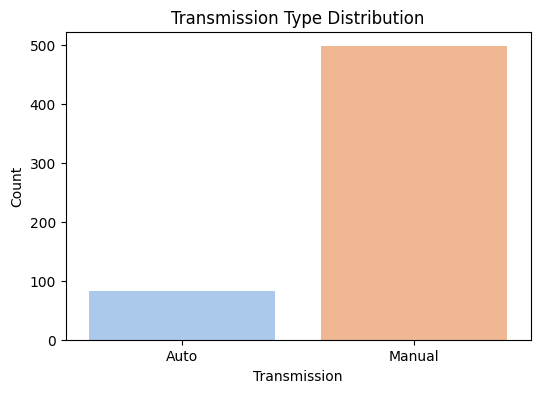

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='Transmission', data=df, palette="pastel")
plt.title("Transmission Type Distribution")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()


### 1.7 Owner Type Distribution

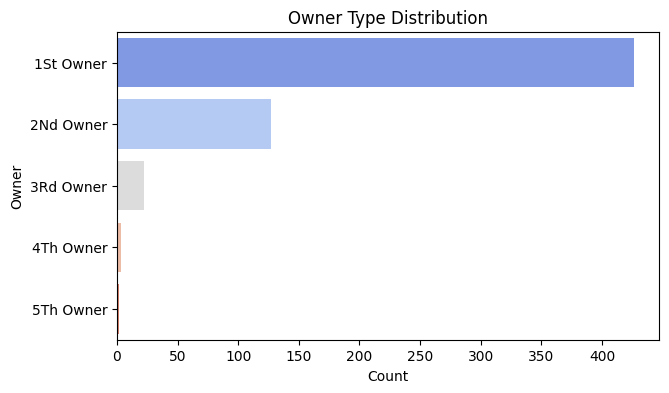

In [39]:
plt.figure(figsize=(7,4))
sns.countplot(y='Owner', data=df, order=df['Owner'].value_counts().index, palette="coolwarm")
plt.title("Owner Type Distribution")
plt.xlabel("Count")
plt.ylabel("Owner")
plt.show()


# BIVARIATE ANALYSIS

### 2.1 Price vs KM Driven

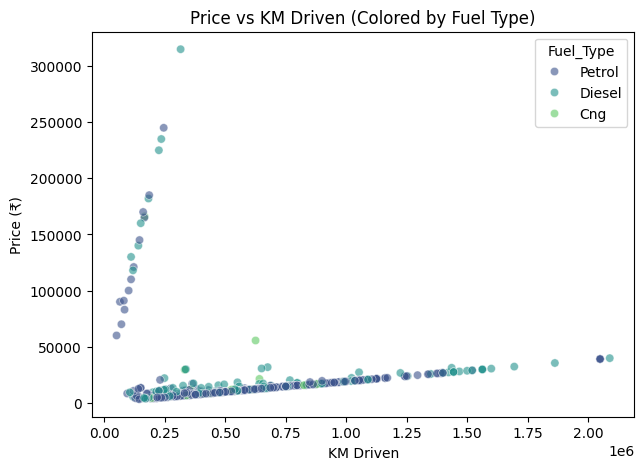

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='KM_Driven', y='Price', data=df, hue='Fuel_Type', alpha=0.6, palette="viridis")
plt.title("Price vs KM Driven (Colored by Fuel Type)")
plt.xlabel("KM Driven")
plt.ylabel("Price (₹)")
plt.show()

### 2.2 Price vs Car Age

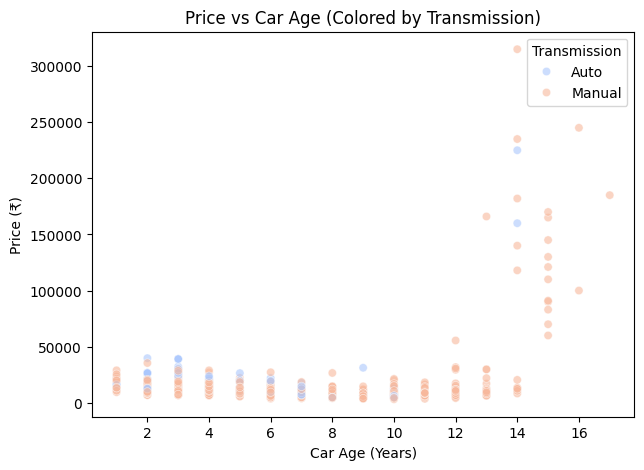

In [41]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Car_Age', y='Price', data=df, hue='Transmission', alpha=0.6, palette="coolwarm")
plt.title("Price vs Car Age (Colored by Transmission)")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price (₹)")
plt.show()


### 2.3 Average Price by Brand (Top 10)

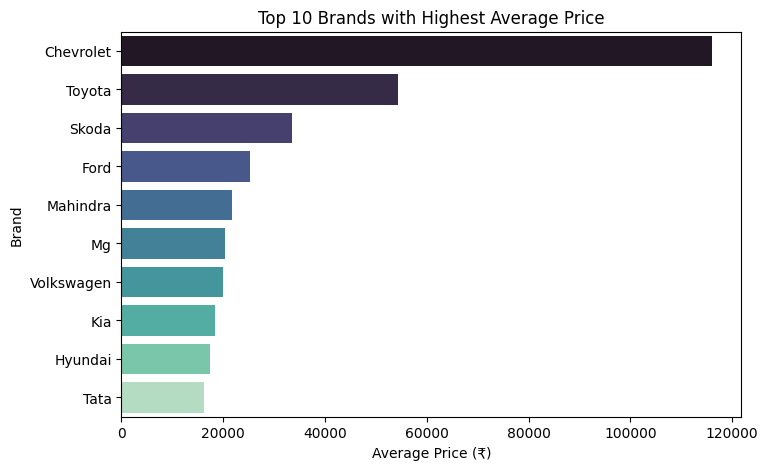

In [45]:
top_brands_price = df.groupby('Brand', as_index=False)['Price'].mean().sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Price', y='Brand', data=top_brands_price, palette="mako")
plt.title("Top 10 Brands with Highest Average Price")
plt.xlabel("Average Price (₹)")
plt.ylabel("Brand")
plt.show()


### 2.4 Price Distribution by Fuel Type

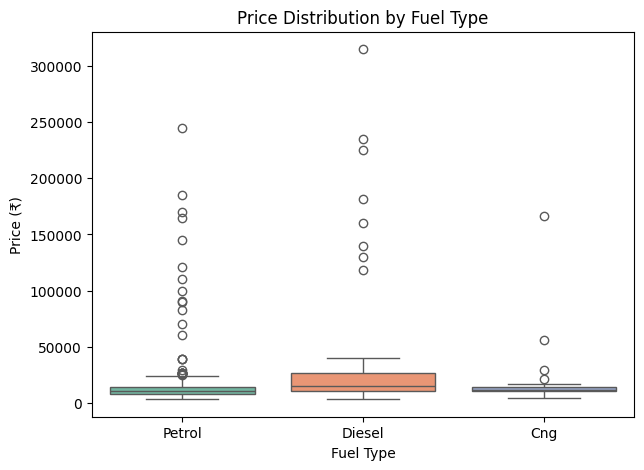

In [47]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette="Set2")
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price (₹)")
plt.show()


### 2.5 Price Distribution by Owner Type

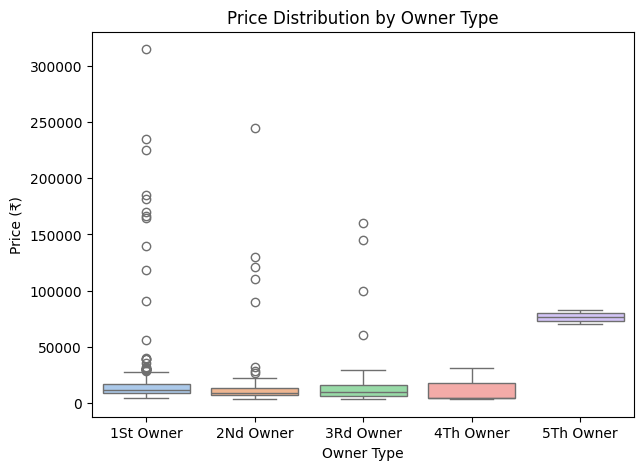

In [49]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Owner', y='Price', data=df, palette="pastel")
plt.title("Price Distribution by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Price (₹)")
plt.show()


### 2.6 Price Distribution by Transmission

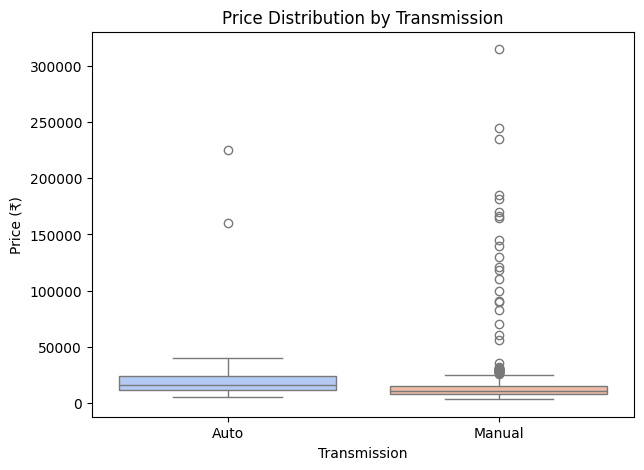

In [50]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Transmission', y='Price', data=df, palette="coolwarm")
plt.title("Price Distribution by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Price (₹)")
plt.show()


#  MULTIVARIATE ANALYSIS

### 3.1 Average Price by City & Fuel Type (Heatmap)

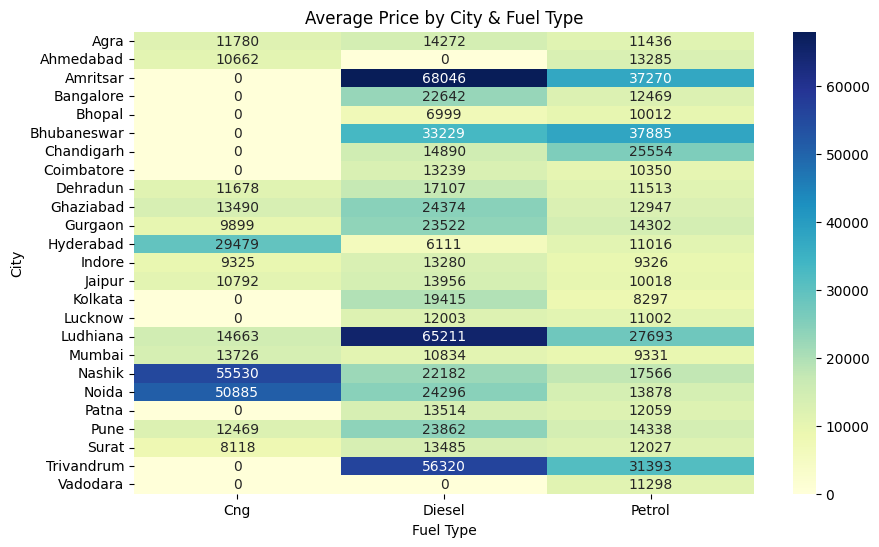

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

price_city_fuel = df.pivot_table(values='Price', index='City', columns='Fuel_Type', aggfunc='mean').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(price_city_fuel, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by City & Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("City")
plt.show()


### 3.2 Average Price by Brand & Transmission (Top 10 Brands)

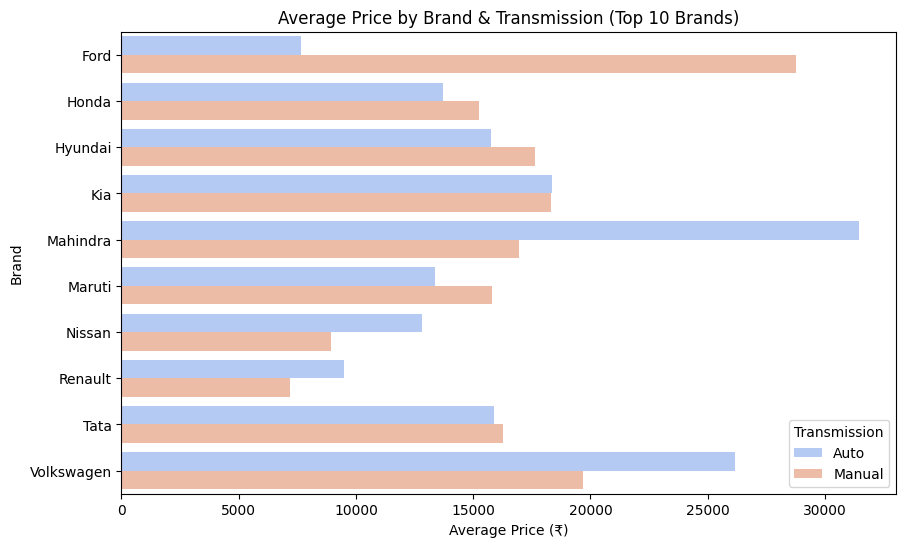

In [53]:
top_brands = df['Brand'].value_counts().head(10).index
brand_trans = df[df['Brand'].isin(top_brands)].groupby(['Brand', 'Transmission'], as_index=False)['Price'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x='Price', y='Brand', hue='Transmission', data=brand_trans, palette="coolwarm")
plt.title("Average Price by Brand & Transmission (Top 10 Brands)")
plt.xlabel("Average Price (₹)")
plt.ylabel("Brand")
plt.show()


### 3.3 Price vs Car Age vs Fuel Type (Bubble Plot)

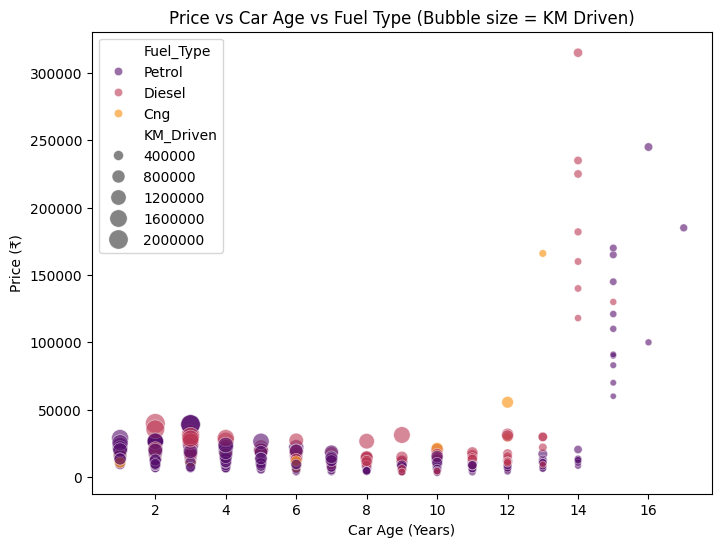

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Car_Age', y='Price', size='KM_Driven', hue='Fuel_Type', 
                data=df, alpha=0.6, palette="inferno", sizes=(20, 200))
plt.title("Price vs Car Age vs Fuel Type (Bubble size = KM Driven)")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price (₹)")
plt.show()


### 3.4 City-wise Average Price by Owner Type

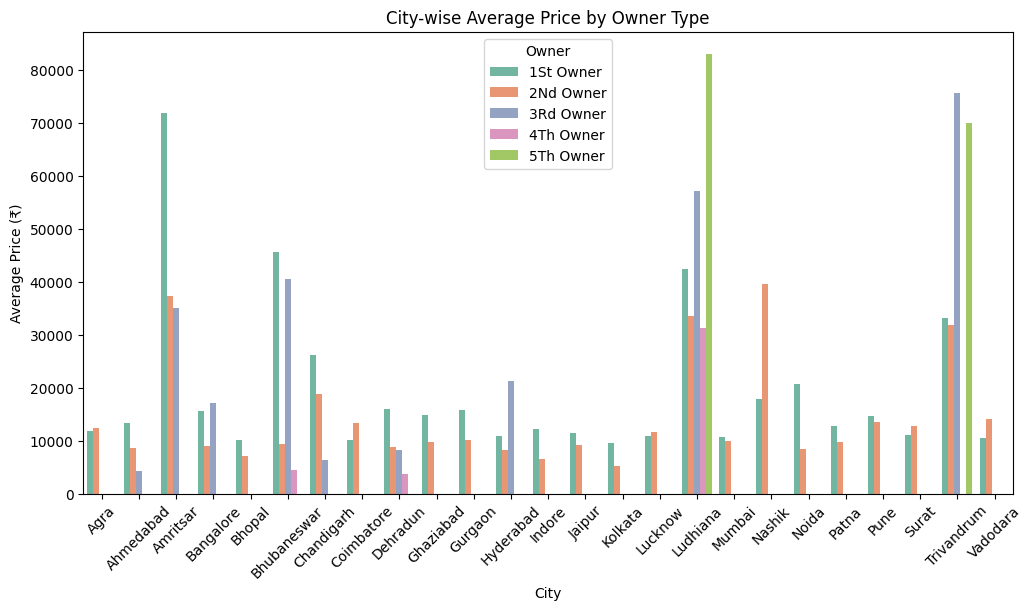

In [61]:
city_owner_price = df.groupby(['City','Owner'], as_index=False)['Price'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Price', hue='Owner', data=city_owner_price, palette="Set2")
plt.title("City-wise Average Price by Owner Type")
plt.xlabel("City")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45)
plt.show()


#  CORRELATION ANALYSIS

### 4.1 Correlation Matrix (Numerical Columns)

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()

corr_matrix


,Year,KM_Driven,EMI_Price,Price,Car_Age,Price_per_KM
Year,1.000000,0.639731,0.320644,-0.328410,-1.000000,-0.475126
KM_Driven,0.639731,1.000000,0.853070,-0.022469,-0.639731,-0.266064
EMI_Price,0.320644,0.853070,1.000000,0.175290,-0.320644,-0.040335
Price,-0.328410,-0.022469,0.175290,1.000000,0.328410,0.866951
Car_Age,-1.000000,-0.639731,-0.320644,0.328410,1.000000,0.475126
Price_per_KM,-0.475126,-0.266064,-0.040335,0.866951,0.475126,1.000000


### 4.2 Heatmap of Correlations

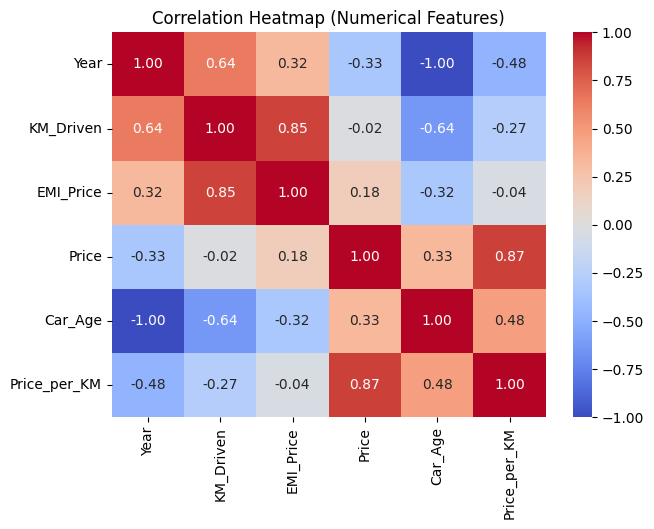

In [66]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# OUTLIER DETECTION

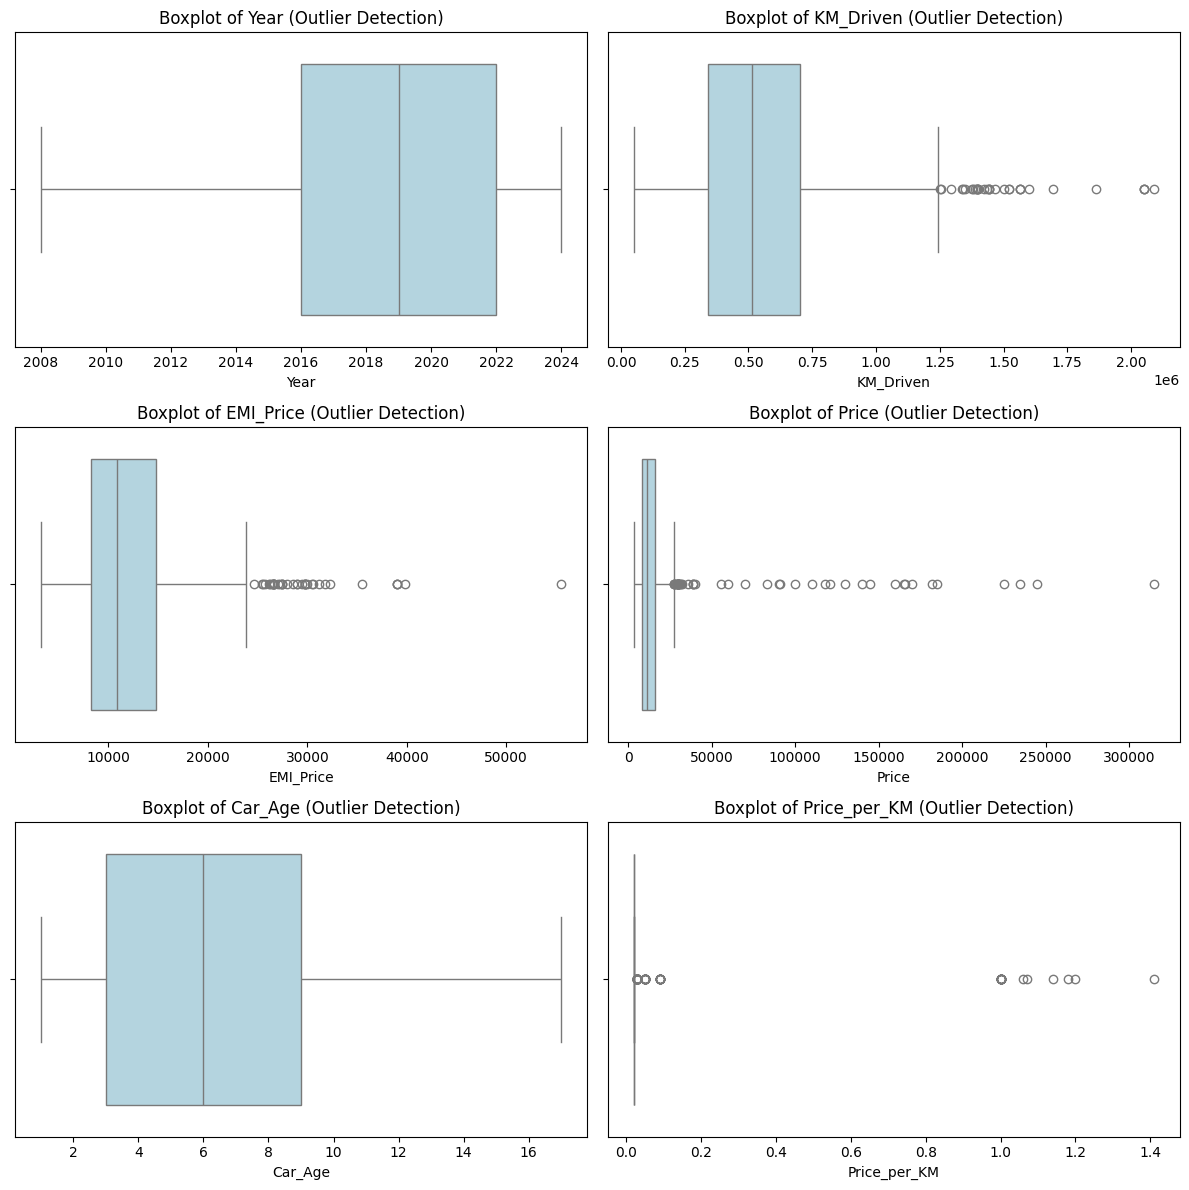

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_num = len(numerical_cols)
rows = int(np.ceil(n_num / 2))  # 2 plots per row

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], color='lightblue', ax=axes[i])
    axes[i].set_title(f"Boxplot of {col} (Outlier Detection)")
    axes[i].set_xlabel(col)

# Hide unused subplots if odd number of columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
